# Algorithme de Warshall pour chemin minimal : comparaisons

On va comparer les performances de 2 versions de l'algorithme de Warshall sur des graphes complets avec poids aléatoires.

## 1  D'abord, les deux versions de l'algorithme de Warshall

Deux fonctions suivent. La première, `WarshallChOptVer1,` avec la version de base, la 2nde `WarshallChOptVer2,` avec une version améliorée.

In [1]:
# --- version de base
def WarshallChOptVer1(W):
    """ Warshall pour chemin min, à partir du graphe valué donné par
        la matrice carrée W de dimension n = nb de sommets du graphe.
        Un poids infini signifie que l'arc correspondant n'existe pas.
        La fonction retourne la matrice W où W[x][y] est la valeur
        minimale des chemins de valeur minimale de x à y.
        
        Version de base.
    """
    inf = float('inf') # --- infini dans les réels
    n = len(W) # --- nb de sommets de G

    for k in range(n):
        for x in range(n):
            for y in range(n):
                 W[x][y] = min(W[x][y],W[x][k] + W[k][y])
    return W


# --- version améliorée
def WarshallChOptVer2(W):
    """ Warshall pour chemin min, à partir du graphe valué donné par
        la matrice carrée W de dimension n = nb de sommets du graphe.
        Un poids infini signifie que l'arc correspondant n'existe pas.
        La fonction retourne la matrice W où W[x][y] est la valeur
        minimale des chemins de valeur minimale de x à y.
        
        Version améliorée (comparer les 2 codes).
    """
    
    inf = float('inf')  # --- infini dans les réels
    n = len(W)          # --- nb de sommets de G

    for k in range(n):
        for x in range(n):
            if W[x][k] < inf:      # --- si = inf, inutile continuer
                for y in range(n): #     sur cet x 
                    if W[k][y] < inf:              # si = inf,inutile
                        somme = W[x][k] + W[k][y]  # de continuer sur
                        if somme < W[x][y]:        # cet y
                            W[x][y] = somme
    return W


In [2]:
def ecr(W):
    """ Cette fonction écrit la matrice W ligne par ligne """
    n = len(W)
    for x in range(n):
        print(W[x])

        
inf = float('inf')
Wa = [
        [inf,   1,   2, inf],
        [inf, inf,   5,   2],
        [inf,   3, inf, inf],
        [inf, inf,   1, inf]
    ]

print(" --- 1er graphe :")
ecr(Wa)

Wa1 = Wa.copy()
WarshallChOptVer1(Wa1)
print("\n Ver. 1 :")
ecr(Wa1)

Wa2 = Wa.copy()
print("\n Ver. 2 :")
WarshallChOptVer1(Wa2)
ecr(Wa2)

 --- 1er graphe :
[inf, 1, 2, inf]
[inf, inf, 5, 2]
[inf, 3, inf, inf]
[inf, inf, 1, inf]

 Ver. 1 :
[inf, 1, 2, 3]
[inf, 6, 3, 2]
[inf, 3, 6, 5]
[inf, 4, 1, 6]

 Ver. 2 :
[inf, 1, 2, 3]
[inf, 6, 3, 2]
[inf, 3, 6, 5]
[inf, 4, 1, 6]


On teste maintenant avec un graphe à 6 sommets.

In [3]:
Wb = [
        [inf,   1,   1,   4, inf,   8],
        [inf, inf, inf,   2, inf, inf],
        [inf, inf, inf,   3, inf,   8],
        [inf, inf, inf, inf, inf,   5],
        [inf,   2, inf, inf, inf,   1],
        [inf, inf, inf, inf, inf, inf]
    ]

print(" --- 2ème graphe :")
ecr(Wb)

Wb1 = Wb.copy()
WarshallChOptVer1(Wb1)
print("\n Ver. 1 :")
ecr(Wb1)

Wb2 = Wb.copy()
print("\n Ver. 2 :")
WarshallChOptVer1(Wb2)
ecr(Wb2)

 --- 2ème graphe :
[inf, 1, 1, 4, inf, 8]
[inf, inf, inf, 2, inf, inf]
[inf, inf, inf, 3, inf, 8]
[inf, inf, inf, inf, inf, 5]
[inf, 2, inf, inf, inf, 1]
[inf, inf, inf, inf, inf, inf]

 Ver. 1 :
[inf, 1, 1, 3, inf, 8]
[inf, inf, inf, 2, inf, 7]
[inf, inf, inf, 3, inf, 8]
[inf, inf, inf, inf, inf, 5]
[inf, 2, inf, 4, inf, 1]
[inf, inf, inf, inf, inf, inf]

 Ver. 2 :
[inf, 1, 1, 3, inf, 8]
[inf, inf, inf, 2, inf, 7]
[inf, inf, inf, 3, inf, 8]
[inf, inf, inf, inf, inf, 5]
[inf, 2, inf, 4, inf, 1]
[inf, inf, inf, inf, inf, inf]


## 2  Création de graphes complets avec poids aléatoires

La fonction `creerKvalue()` crée un graphe complet avec poids entiers aléatoires. On passe le nombre de sommets $n \geq 2$ et un entier $H \geq 1$ et les poids sont tirés uniformément sur l'ensemble $\{ 1, 2, \ldots, H \}$.

In [4]:
def creerKvalue(n,H):
    """ construit un graphe complet avec n >= 2 sommets, valué,
        avec poids tirés uniformément dans {1,2,...,H} ;
        la fonction retourne la matrice n * n des poids
    """
    from numpy.random import randint as ri
    
    inf = float('inf')
    
    # --- on remplit W avec inf
    W = [ [inf for _ in range(n)] for _ in range(n) ]
    
    for x in range(n):
        for y in range(x+1,n):
            v = ri(1,H+1)
            W[x][y] = v
            W[y][x] = v

    return W

On teste sur quelques graphes.

## Comparaison des performances des deux versions de Warshall sur des graphes complets avec poids aléatoires

On va comparer les performances des deux versions de Warshall sur des graphes complets avec poids aléatoires.

In [5]:
def comparWarshall(n1,n2,H,r):
    """ On compare les deux mises en oeuvre de Warshall décrites plus haut
        sur des graphes complets de n sommets, n allant de n1 à n2, avec
        poids entiers tirés aléatoirement entre 1 et H.
        Chaque exécution de Warshall est répétée à l'identique r fois.
    """
    from timeit import default_timer as timer
    
    resulVer1 = []
    resulVer2 = []
    
    for n in range(n1,n2+1):
        
        W = creerKvalue(n,H)
        
        t0 = timer()
        for _ in range(r): # on refait r fois
            WW = list(W)
            WarshallChOptVer1(WW) 
        delta = timer() - t0
        resulVer1.append(delta)

        t0 = timer()
        for _ in range(r): # on refait r fois
            WW = list(W)
            WarshallChOptVer2(WW)
        delta = timer() - t0
        resulVer2.append(delta)
     
    return resulVer1,resulVer2

On remarquera que dans le temps d'exécution on a inclut la copie de la matrice `W`. Ceci dit, d'une part, elle est la même pour les deux algos, et, d'autre part, la complexité de la copie, pour $n$ sommets, est $O(n^2)$ ; Warshall (les deux versions) est en $O(n^3)$.

On teste sur des graphes de taille modérée.

In [6]:
n1 = 10
n2 = 20
H = 10
r = 100
res1,res2 = comparWarshall(n1,n2,H,r)

In [7]:
# --- on regarde les valeurs des temps d'exécution
print("\n --- Ver de base:")
for n in range(n1,n2+1):
    print(n,res1[n-n1])
print("\n --- Ver améliorée:")
for n in range(n1,n2+1):
    print(n,res2[n-n1])


 --- Ver de base:
10 0.02830717199999999
11 0.03600769000000004
12 0.042560229000000005
13 0.05639691899999999
14 0.07181414200000003
15 0.08309935700000004
16 0.10505880099999998
17 0.13103181500000005
18 0.164975879
19 0.16310530199999995
20 0.192057111

 --- Ver améliorée:
10 0.02046169100000006
11 0.025228735000000002
12 0.03319375299999994
13 0.04389583600000013
14 0.05270144500000007
15 0.05981039900000007
16 0.07834115100000005
17 0.08881398600000012
18 0.11197030000000008
19 0.12336311200000027
20 0.13976126199999994


Maintenant on fait la comparaison sur K10, K11, ..., K30.

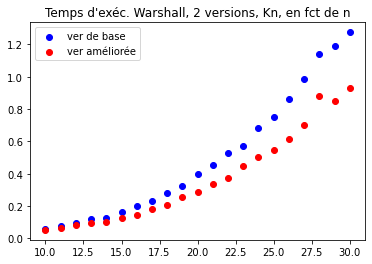

In [8]:
n1 = 10 # --- à partir de n1 sommets
n2 = 30 #     jusqu'à n2 sommets
H = 10  # --- poids entiers unif. sur {1,2,...,10}
r = 200 # --- on refait les calculs 200 fois

res1,res2 = comparWarshall(n1,n2,H,r)

import matplotlib.pyplot as plt

x = [n for n in range(n1,n2+1)]
plt.scatter(x, res1, c = 'blue',label = "ver de base")
plt.scatter(x, res2, c = 'red',label = "ver améliorée")
plt.legend()
plt.title("Temps d'exéc. Warshall, 2 versions, Kn, en fct de n")
plt.show()

On refait une comparaison mais de 90 à 100 sommets.

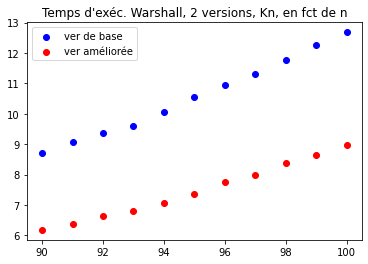

In [9]:
n1 = 90
n2 = 100
H = 10
r = 50  # --- plus petit qu'avant, pour réduire la durée
        #     du test

res1,res2 = comparWarshall(n1,n2,H,r)
x = [n for n in range(n1,n2+1)]
plt.scatter(x, res1, c = 'blue',label = "ver de base")
plt.scatter(x, res2, c = 'red',label = "ver améliorée")
plt.legend()
plt.title("Temps d'exéc. Warshall, 2 versions, Kn, en fct de n")
plt.show()